### Data Visualization

In [1]:
#General
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#import combat
#from combat import combat
#import patsy

#Normalization
from sklearn.preprocessing import StandardScaler

#Outlier removal
import scipy
from scipy import stats
from scipy.stats import zscore

#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 800)

In [3]:
#Creating a dataframe from txt file

df = pd.read_csv('../data/mkf52b_all_total_mean_insaturations.csv', delimiter = ";", header = 0)
pd.set_option('display.max_rows', 20)
df

,lipid class,#db bonds,01PCCL3Ctrl,02PCCL3Ctrl,03PCCL3Ctrl,04PCCL3TSH0,05PCCL3TSH0,06PCCL3TSH0,07PCCL3TSH24h,08PCCL3TSH24h,09PCCL3TSH24h,10PCCL3TSH48h,11PCCL3TSH48h,12PCCL3TSH48h,13Blank,14BlankStdrmix
0,GL02_DAG,0,1.570000e+07,9.850000e+06,1.560000e+07,1.810000e+06,1.140000e+06,1.660000e+06,5.120000e+06,7.040000e+06,6.010000e+06,1.250000e+07,1.380000e+07,1.300000e+07,77800.0,135000.0
1,GL02_DAG,1,5.110000e+07,4.290000e+07,5.820000e+07,1.380000e+07,1.550000e+07,1.430000e+07,1.880000e+07,2.290000e+07,2.510000e+07,6.160000e+07,6.650000e+07,6.330000e+07,4980000.0,3830000.0
2,GL02_DAG,2,4.700000e+07,4.700000e+07,5.930000e+07,1.740000e+07,1.870000e+07,1.760000e+07,1.950000e+07,2.260000e+07,2.260000e+07,7.420000e+07,7.750000e+07,7.340000e+07,7120000.0,9000000.0
3,GL02_DAG,3,1.970000e+07,1.920000e+07,2.710000e+07,1.140000e+07,1.090000e+07,1.050000e+07,5.970000e+06,1.070000e+07,9.860000e+06,2.850000e+07,3.130000e+07,2.970000e+07,5950000.0,4630000.0
4,GL02_DAG,4,7.210000e+06,5.490000e+06,9.740000e+06,4.230000e+06,3.750000e+06,3.970000e+06,2.330000e+06,2.910000e+06,2.400000e+06,7.250000e+06,6.890000e+06,7.170000e+06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,SP03_PxCer,SUM,2.820000e+09,2.780000e+09,2.930000e+09,2.330000e+09,2.480000e+09,2.220000e+09,2.610000e+09,2.450000e+09,5.530000e+09,1.730000e+09,2.770000e+09,2.510000e+09,0.0,252000000.0
158,SP05_GlcCer,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.690000e+05,5.470000e+05,0.000000e+00,0.0,0.0
159,SP05_GlcCer,1,3.040000e+08,2.000000e+08,2.610000e+08,1.330000e+08,1.310000e+08,1.240000e+08,2.180000e+08,1.800000e+08,4.770000e+08,2.720000e+08,4.040000e+08,3.880000e+08,0.0,46600000.0
160,SP05_GlcCer,2,8.530000e+06,4.690000e+06,7.590000e+06,2.460000e+06,1.850000e+06,1.350000e+06,6.230000e+06,5.720000e+06,1.360000e+07,1.350000e+07,1.640000e+07,1.710000e+07,203000.0,201000.0


In [4]:
#Selection of important characters on columns Class and Lipid

Class2 = []
for i,row in df.iterrows():
    
    lipid = row['lipid class']
    db = row['#db bonds']
    
    lipid = lipid.split('_')
    if lipid[1] == 'PxCer':
        Class2.append(f'SM_{db}')
    else:
        Class2.append(f'{lipid[1]}_{db}')
    
df.insert(0, 'Class2', Class2)

In [5]:
df

,Class2,lipid class,#db bonds,01PCCL3Ctrl,02PCCL3Ctrl,03PCCL3Ctrl,04PCCL3TSH0,05PCCL3TSH0,06PCCL3TSH0,07PCCL3TSH24h,08PCCL3TSH24h,09PCCL3TSH24h,10PCCL3TSH48h,11PCCL3TSH48h,12PCCL3TSH48h,13Blank,14BlankStdrmix
0,DAG_0,GL02_DAG,0,1.570000e+07,9.850000e+06,1.560000e+07,1.810000e+06,1.140000e+06,1.660000e+06,5.120000e+06,7.040000e+06,6.010000e+06,1.250000e+07,1.380000e+07,1.300000e+07,77800.0,135000.0
1,DAG_1,GL02_DAG,1,5.110000e+07,4.290000e+07,5.820000e+07,1.380000e+07,1.550000e+07,1.430000e+07,1.880000e+07,2.290000e+07,2.510000e+07,6.160000e+07,6.650000e+07,6.330000e+07,4980000.0,3830000.0
2,DAG_2,GL02_DAG,2,4.700000e+07,4.700000e+07,5.930000e+07,1.740000e+07,1.870000e+07,1.760000e+07,1.950000e+07,2.260000e+07,2.260000e+07,7.420000e+07,7.750000e+07,7.340000e+07,7120000.0,9000000.0
3,DAG_3,GL02_DAG,3,1.970000e+07,1.920000e+07,2.710000e+07,1.140000e+07,1.090000e+07,1.050000e+07,5.970000e+06,1.070000e+07,9.860000e+06,2.850000e+07,3.130000e+07,2.970000e+07,5950000.0,4630000.0
4,DAG_4,GL02_DAG,4,7.210000e+06,5.490000e+06,9.740000e+06,4.230000e+06,3.750000e+06,3.970000e+06,2.330000e+06,2.910000e+06,2.400000e+06,7.250000e+06,6.890000e+06,7.170000e+06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,SM_SUM,SP03_PxCer,SUM,2.820000e+09,2.780000e+09,2.930000e+09,2.330000e+09,2.480000e+09,2.220000e+09,2.610000e+09,2.450000e+09,5.530000e+09,1.730000e+09,2.770000e+09,2.510000e+09,0.0,252000000.0
158,GlcCer_0,SP05_GlcCer,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.690000e+05,5.470000e+05,0.000000e+00,0.0,0.0
159,GlcCer_1,SP05_GlcCer,1,3.040000e+08,2.000000e+08,2.610000e+08,1.330000e+08,1.310000e+08,1.240000e+08,2.180000e+08,1.800000e+08,4.770000e+08,2.720000e+08,4.040000e+08,3.880000e+08,0.0,46600000.0
160,GlcCer_2,SP05_GlcCer,2,8.530000e+06,4.690000e+06,7.590000e+06,2.460000e+06,1.850000e+06,1.350000e+06,6.230000e+06,5.720000e+06,1.360000e+07,1.350000e+07,1.640000e+07,1.710000e+07,203000.0,201000.0


<AxesSubplot:>

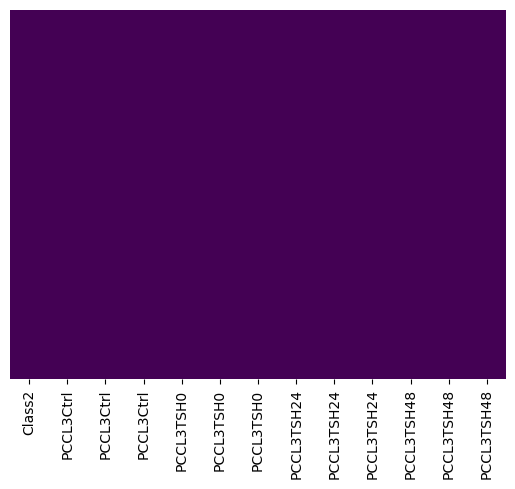

In [6]:
#Elimination of unnecesary columns
df = df.drop(['lipid class','#db bonds','13Blank','14BlankStdrmix'], axis = 1)
#Rename Columns
df = df.rename(columns = {'01PCCL3Ctrl': 'PCCL3Ctrl', '02PCCL3Ctrl': 'PCCL3Ctrl', '03PCCL3Ctrl': 'PCCL3Ctrl',
                          '04PCCL3TSH0': 'PCCL3TSH0', '05PCCL3TSH0': 'PCCL3TSH0', '06PCCL3TSH0': 'PCCL3TSH0',
                          '07PCCL3TSH24h': 'PCCL3TSH24', '08PCCL3TSH24h': 'PCCL3TSH24', '09PCCL3TSH24h': 'PCCL3TSH24',
                          '10PCCL3TSH48h': 'PCCL3TSH48', '11PCCL3TSH48h': 'PCCL3TSH48', '12PCCL3TSH48h': 'PCCL3TSH48'}
               , inplace = False)

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

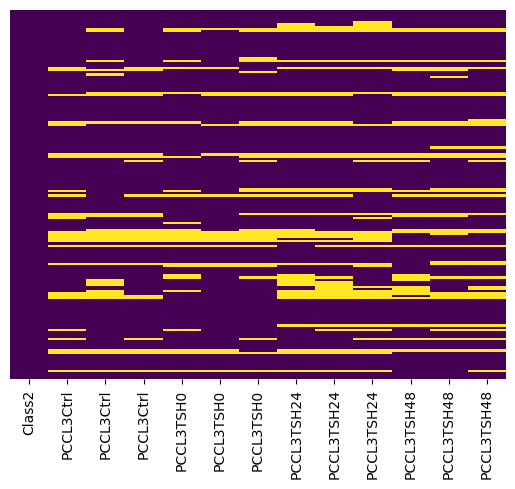

In [7]:
#transform 0 to nans
df.replace(0, np.nan, inplace=True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

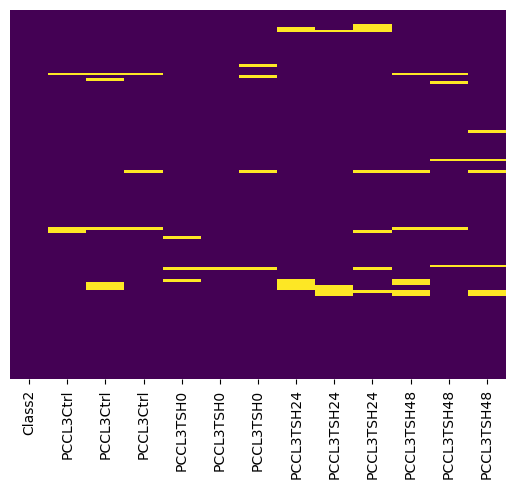

In [8]:
# dropping the NaNs, treshols 7 means that those rows with at least 7 non-NaN values are kept
df = df.dropna(axis=0, how='any', thresh=8, inplace=False)
df = df.reset_index(drop = True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [9]:
#transpose of the dataframe
df_t = df.T
df_t = df_t.reset_index(drop = False)
#df_t.iloc[2:,1:] = df_t.iloc[2:,1:].apply(pd.to_numeric, errors='coerce')
df_t

,index,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,128
0,Class2,DAG_0,DAG_1,DAG_2,DAG_3,DAG_4,DAG_5,DAG_6,DAG_7,DAG_13,...,CER_SUM,SM_0,SM_1,SM_2,SM_3,SM_4,SM_SUM,GlcCer_1,GlcCer_2,GlcCer_SUM
1,PCCL3Ctrl,15700000.0,51100000.0,47000000.0,19700000.0,7210000.0,3930000.0,6100000.0,4200000.0,35300000.0,...,510000000.0,25900000.0,2490000000.0,252000000.0,53100000.0,3850000.0,2820000000.0,304000000.0,8530000.0,312000000.0
2,PCCL3Ctrl,9850000.0,42900000.0,47000000.0,19200000.0,5490000.0,3560000.0,5660000.0,4350000.0,23900000.0,...,326000000.0,28400000.0,2490000000.0,217000000.0,48000000.0,2870000.0,2780000000.0,200000000.0,4690000.0,205000000.0
3,PCCL3Ctrl,15600000.0,58200000.0,59300000.0,27100000.0,9740000.0,4700000.0,8400000.0,6170000.0,34300000.0,...,469000000.0,36700000.0,2600000000.0,234000000.0,56200000.0,3300000.0,2930000000.0,261000000.0,7590000.0,268000000.0
4,PCCL3TSH0,1810000.0,13800000.0,17400000.0,11400000.0,4230000.0,2260000.0,1520000.0,1300000.0,29800000.0,...,550000000.0,26300000.0,2050000000.0,227000000.0,32900000.0,3530000.0,2330000000.0,133000000.0,2460000.0,136000000.0
5,PCCL3TSH0,1140000.0,15500000.0,18700000.0,10900000.0,3750000.0,2430000.0,967000.0,1140000.0,29200000.0,...,558000000.0,28300000.0,2200000000.0,216000000.0,34500000.0,3370000.0,2480000000.0,131000000.0,1850000.0,133000000.0
6,PCCL3TSH0,1660000.0,14300000.0,17600000.0,10500000.0,3970000.0,2170000.0,1200000.0,1190000.0,31100000.0,...,524000000.0,23600000.0,1940000000.0,221000000.0,30600000.0,3220000.0,2220000000.0,124000000.0,1350000.0,125000000.0
7,PCCL3TSH24,5120000.0,18800000.0,19500000.0,5970000.0,2330000.0,308000.0,NaN,NaN,23100000.0,...,443000000.0,38500000.0,2330000000.0,195000000.0,40100000.0,2680000.0,2610000000.0,218000000.0,6230000.0,224000000.0
8,PCCL3TSH24,7040000.0,22900000.0,22600000.0,10700000.0,2910000.0,686000.0,820000.0,NaN,24300000.0,...,439000000.0,32500000.0,2170000000.0,200000000.0,38500000.0,2770000.0,2450000000.0,180000000.0,5720000.0,186000000.0
9,PCCL3TSH24,6010000.0,25100000.0,22600000.0,9860000.0,2400000.0,NaN,NaN,NaN,30600000.0,...,558000000.0,105000000.0,5010000000.0,345000000.0,69200000.0,2930000.0,5530000000.0,477000000.0,13600000.0,490000000.0


/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_1463/1131074213.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_1463/1131074213.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_1463/1131074213.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before 

<AxesSubplot:>

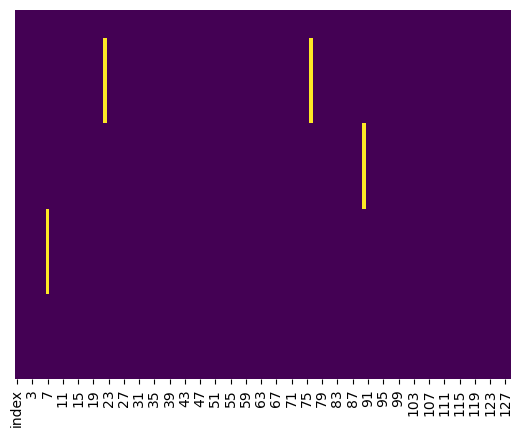

In [10]:
#group by condition and fill nan with the mean of the condition
df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
df_t = df_t.reset_index(drop = True)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

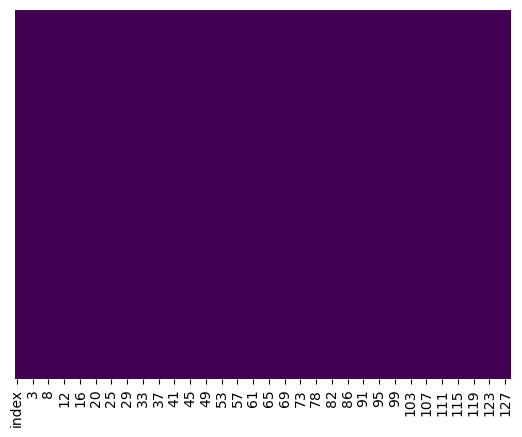

In [11]:
#droppping the rest of the Nans
df_t = df_t.dropna(axis=1, inplace=False)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [12]:
df_t = df_t.rename(columns=df_t.iloc[0])
df_t = df_t.iloc[1: , :]
df_t

,Class2,DAG_0,DAG_1,DAG_2,DAG_3,DAG_4,DAG_5,DAG_6,DAG_13,DAG_14,...,CER_SUM,SM_0,SM_1,SM_2,SM_3,SM_4,SM_SUM,GlcCer_1,GlcCer_2,GlcCer_SUM
1,PCCL3Ctrl,15700000.0,51100000.0,47000000.0,19700000.0,7210000.0,3930000.0,6100000.0,35300000.0,10800000.0,...,510000000.0,25900000.0,2490000000.0,252000000.0,53100000.0,3850000.0,2820000000.0,304000000.0,8530000.0,312000000.0
2,PCCL3Ctrl,9850000.0,42900000.0,47000000.0,19200000.0,5490000.0,3560000.0,5660000.0,23900000.0,6550000.0,...,326000000.0,28400000.0,2490000000.0,217000000.0,48000000.0,2870000.0,2780000000.0,200000000.0,4690000.0,205000000.0
3,PCCL3Ctrl,15600000.0,58200000.0,59300000.0,27100000.0,9740000.0,4700000.0,8400000.0,34300000.0,10400000.0,...,469000000.0,36700000.0,2600000000.0,234000000.0,56200000.0,3300000.0,2930000000.0,261000000.0,7590000.0,268000000.0
4,PCCL3TSH0,1810000.0,13800000.0,17400000.0,11400000.0,4230000.0,2260000.0,1520000.0,29800000.0,9130000.0,...,550000000.0,26300000.0,2050000000.0,227000000.0,32900000.0,3530000.0,2330000000.0,133000000.0,2460000.0,136000000.0
5,PCCL3TSH0,1140000.0,15500000.0,18700000.0,10900000.0,3750000.0,2430000.0,967000.0,29200000.0,9030000.0,...,558000000.0,28300000.0,2200000000.0,216000000.0,34500000.0,3370000.0,2480000000.0,131000000.0,1850000.0,133000000.0
6,PCCL3TSH0,1660000.0,14300000.0,17600000.0,10500000.0,3970000.0,2170000.0,1200000.0,31100000.0,9310000.0,...,524000000.0,23600000.0,1940000000.0,221000000.0,30600000.0,3220000.0,2220000000.0,124000000.0,1350000.0,125000000.0
7,PCCL3TSH24,5120000.0,18800000.0,19500000.0,5970000.0,2330000.0,308000.0,820000.0,23100000.0,7570000.0,...,443000000.0,38500000.0,2330000000.0,195000000.0,40100000.0,2680000.0,2610000000.0,218000000.0,6230000.0,224000000.0
8,PCCL3TSH24,7040000.0,22900000.0,22600000.0,10700000.0,2910000.0,686000.0,820000.0,24300000.0,7510000.0,...,439000000.0,32500000.0,2170000000.0,200000000.0,38500000.0,2770000.0,2450000000.0,180000000.0,5720000.0,186000000.0
9,PCCL3TSH24,6010000.0,25100000.0,22600000.0,9860000.0,2400000.0,497000.0,820000.0,30600000.0,9450000.0,...,558000000.0,105000000.0,5010000000.0,345000000.0,69200000.0,2930000.0,5530000000.0,477000000.0,13600000.0,490000000.0
10,PCCL3TSH48,12500000.0,61600000.0,74200000.0,28500000.0,7250000.0,1900000.0,2510000.0,22800000.0,5430000.0,...,711000000.0,21400000.0,1490000000.0,186000000.0,30700000.0,3500000.0,1730000000.0,272000000.0,13500000.0,286000000.0


In [58]:
df_n = df_t.T
df_n.columns = ['PCCL3Ctrl', 'PCCL3Ctrl', 'PCCL3Ctrl', 'PCCL3TSH0', 'PCCL3TSH0', 'PCCL3TSH0','PCCL3TSH24','PCCL3TSH24','PCCL3TSH24','PCCL3TSH48','PCCL3TSH48','PCCL3TSH48']
df_n = df_n.iloc[1: , :]
df_n

,PCCL3Ctrl,PCCL3Ctrl,PCCL3Ctrl,PCCL3TSH0,PCCL3TSH0,PCCL3TSH0,PCCL3TSH24,PCCL3TSH24,PCCL3TSH24,PCCL3TSH48,PCCL3TSH48,PCCL3TSH48
DAG_0,15700000.0,9850000.0,15600000.0,1810000.0,1140000.0,1660000.0,5120000.0,7040000.0,6010000.0,12500000.0,13800000.0,13000000.0
DAG_1,51100000.0,42900000.0,58200000.0,13800000.0,15500000.0,14300000.0,18800000.0,22900000.0,25100000.0,61600000.0,66500000.0,63300000.0
DAG_2,47000000.0,47000000.0,59300000.0,17400000.0,18700000.0,17600000.0,19500000.0,22600000.0,22600000.0,74200000.0,77500000.0,73400000.0
DAG_3,19700000.0,19200000.0,27100000.0,11400000.0,10900000.0,10500000.0,5970000.0,10700000.0,9860000.0,28500000.0,31300000.0,29700000.0
DAG_4,7210000.0,5490000.0,9740000.0,4230000.0,3750000.0,3970000.0,2330000.0,2910000.0,2400000.0,7250000.0,6890000.0,7170000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
SM_4,3850000.0,2870000.0,3300000.0,3530000.0,3370000.0,3220000.0,2680000.0,2770000.0,2930000.0,3500000.0,3800000.0,4180000.0
SM_SUM,2820000000.0,2780000000.0,2930000000.0,2330000000.0,2480000000.0,2220000000.0,2610000000.0,2450000000.0,5530000000.0,1730000000.0,2770000000.0,2510000000.0
GlcCer_1,304000000.0,200000000.0,261000000.0,133000000.0,131000000.0,124000000.0,218000000.0,180000000.0,477000000.0,272000000.0,404000000.0,388000000.0
GlcCer_2,8530000.0,4690000.0,7590000.0,2460000.0,1850000.0,1350000.0,6230000.0,5720000.0,13600000.0,13500000.0,16400000.0,17100000.0


### Creation of a new df with pvalue and fold_change values for inputing the Volcano Class

In [59]:
#creating new df with mean, std and n.obs
df2 = df_n.astype('float64').copy()
df_pvalue = pd.DataFrame()
df_pvalue['PCCL3Ctrl_mean'] = df2.groupby(axis = 1, level = 0).mean()['PCCL3TSH0']
df_pvalue['PCCL3Ctrl_std'] = df2.groupby(axis = 1, level = 0).std()['PCCL3TSH0']
df_pvalue['PCCL3Ctrl_n'] = 3
df_pvalue['PCCL3TSH0_mean'] = df2.groupby(axis = 1, level = 0).mean()['PCCL3TSH0']
df_pvalue['PCCL3TSH0_std'] = df2.groupby(axis = 1, level = 0).std()['PCCL3TSH0']
df_pvalue['PCCL3TSH0_n'] = 3
df_pvalue['PCCL3TSH24_mean'] = df2.groupby(axis = 1, level = 0).mean()['PCCL3TSH24']
df_pvalue['PCCL3TSH24_std'] = df2.groupby(axis = 1, level = 0).std()['PCCL3TSH24']
df_pvalue['PCCL3TSH24_n'] = 3
df_pvalue['PCCL3TSH48_mean'] = df2.groupby(axis = 1, level = 0).mean()['PCCL3TSH48']
df_pvalue['PCCL3TSH48_std'] = df2.groupby(axis = 1, level = 0).std()['PCCL3TSH48']
df_pvalue['PCCL3TSH48_n'] = 3

#pvalue function
df_pvalue['pvalue'] = df_pvalue.apply(lambda x: stats.ttest_ind_from_stats(x['PCCL3TSH48_mean'],x['PCCL3TSH48_std'],x['PCCL3TSH48_n'], 
                                                     x['PCCL3TSH0_mean'],x['PCCL3TSH0_std'],x['PCCL3TSH0_n'])[1],axis=1)
# convert pvalue to minus log10
df_pvalue['pvalue'] = df_pvalue['pvalue'].transform(lambda x: -np.log10(x))
df_pvalue = df_pvalue.rename(columns = {'pvalue': 'minuslog10_pvalue'}, inplace = False)

#fold change
df_pvalue['fold_change'] = df_pvalue['PCCL3TSH48_mean'].div(df_pvalue['PCCL3TSH0_mean'], axis = 0)

# convert fold change to log2
df_pvalue['log2_fold_change'] = df_pvalue['fold_change'].transform(lambda x: np.log2(x))

# save to csv
df_pvalue.to_csv('../procesed_datasets/pccl3_tsh_fc_pvalue.csv')

In [60]:
df_pvalue

,PCCL3Ctrl_mean,PCCL3Ctrl_std,PCCL3Ctrl_n,PCCL3TSH0_mean,PCCL3TSH0_std,PCCL3TSH0_n,PCCL3TSH24_mean,PCCL3TSH24_std,PCCL3TSH24_n,PCCL3TSH48_mean,PCCL3TSH48_std,PCCL3TSH48_n,minuslog10_pvalue,fold_change,log2_fold_change
DAG_0,1.536667e+06,3.516153e+05,3,1.536667e+06,3.516153e+05,3,6.056667e+06,9.608503e+05,3,1.310000e+07,6.557439e+05,3,4.945964,8.524946,3.091691
DAG_1,1.453333e+07,8.736895e+05,3,1.453333e+07,8.736895e+05,3,2.226667e+07,3.197395e+06,3,6.380000e+07,2.487971e+06,3,5.264678,4.389908,2.134191
DAG_2,1.790000e+07,7.000000e+05,3,1.790000e+07,7.000000e+05,3,2.156667e+07,1.789786e+06,3,7.503333e+07,2.173323e+06,3,5.770958,4.191806,2.067572
DAG_3,1.093333e+07,4.509250e+05,3,1.093333e+07,4.509250e+05,3,8.843333e+06,2.523576e+06,3,2.983333e+07,1.404754e+06,3,4.612213,2.728659,1.448192
DAG_4,3.983333e+06,2.402776e+05,3,3.983333e+06,2.402776e+05,3,2.546667e+06,3.165965e+05,3,7.103333e+06,1.890326e+05,3,4.220606,1.783264,0.834520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SM_4,3.373333e+06,1.550269e+05,3,3.373333e+06,1.550269e+05,3,2.793333e+06,1.266228e+05,3,3.826667e+06,3.407834e+05,3,0.983082,1.134387,0.181913
SM_SUM,2.343333e+09,1.305118e+08,3,2.343333e+09,1.305118e+08,3,3.530000e+09,1.733897e+09,3,2.336667e+09,5.412332e+08,3,0.006808,0.997155,-0.004110
GlcCer_1,1.293333e+08,4.725816e+06,3,1.293333e+08,4.725816e+06,3,2.916667e+08,1.616240e+08,3,3.546667e+08,7.203703e+07,3,2.246532,2.742268,1.455370
GlcCer_2,1.886667e+06,5.559077e+05,3,1.886667e+06,5.559077e+05,3,8.516667e+06,4.409675e+06,3,1.566667e+07,1.908752e+06,3,3.559199,8.303887,3.053787


In [73]:
import re
# We need to melt the DataFrame to make 'conditions' as one of the variables
df_lbpa = df_pvalue[df_pvalue.index.str.contains("SM")]

# Melt the DataFrame to make 'conditions' as one of the variables
df_melted = df_lbpa.reset_index().melt(id_vars=['index'], value_vars=[
    'PCCL3Ctrl_mean', 'PCCL3Ctrl_std', 'PCCL3TSH0_mean', 'PCCL3TSH0_std',
    'PCCL3TSH24_mean', 'PCCL3TSH24_std', 'PCCL3TSH48_mean', 'PCCL3TSH48_std'
])

# Improved extraction of 'condition' and 'stat' using regex
def extract_condition(var_name):
    match = re.match(r"([A-Za-z0-9]+)_(mean|std)", var_name)
    if match:
        return match.group(1)

def extract_stat(var_name):
    match = re.match(r"([A-Za-z0-9]+)_(mean|std)", var_name)
    if match:
        return match.group(2)

df_melted['condition'] = df_melted['variable'].apply(extract_condition)
df_melted['stat'] = df_melted['variable'].apply(extract_stat)

# Correct typos and consolidate condition names
condition_corrections = {
    'PCCL3Ctr': 'PCCL3Ctrl',
    'PCCL3TSH': 'PCCL3TSH0',
    'PCCL3TSH2': 'PCCL3TSH24',
    'PCCL3TSH4': 'PCCL3TSH48'
}
df_melted['condition'] = df_melted['condition'].replace(condition_corrections)

# Pivot table to have mean and std in separate columns
df_pivot = df_melted.pivot_table(index=['index', 'condition'], columns='stat', values='value', aggfunc='first').reset_index()

# Ensure unique lipid identifiers for plotting
df_pivot['index'] = pd.Categorical(df_pivot['index'], categories=df_pivot['index'].unique(), ordered=True)

In [74]:
df_pivot['condition'].unique()

array(['PCCL3Ctrl', 'PCCL3TSH0', 'PCCL3TSH24', 'PCCL3TSH48'], dtype=object)

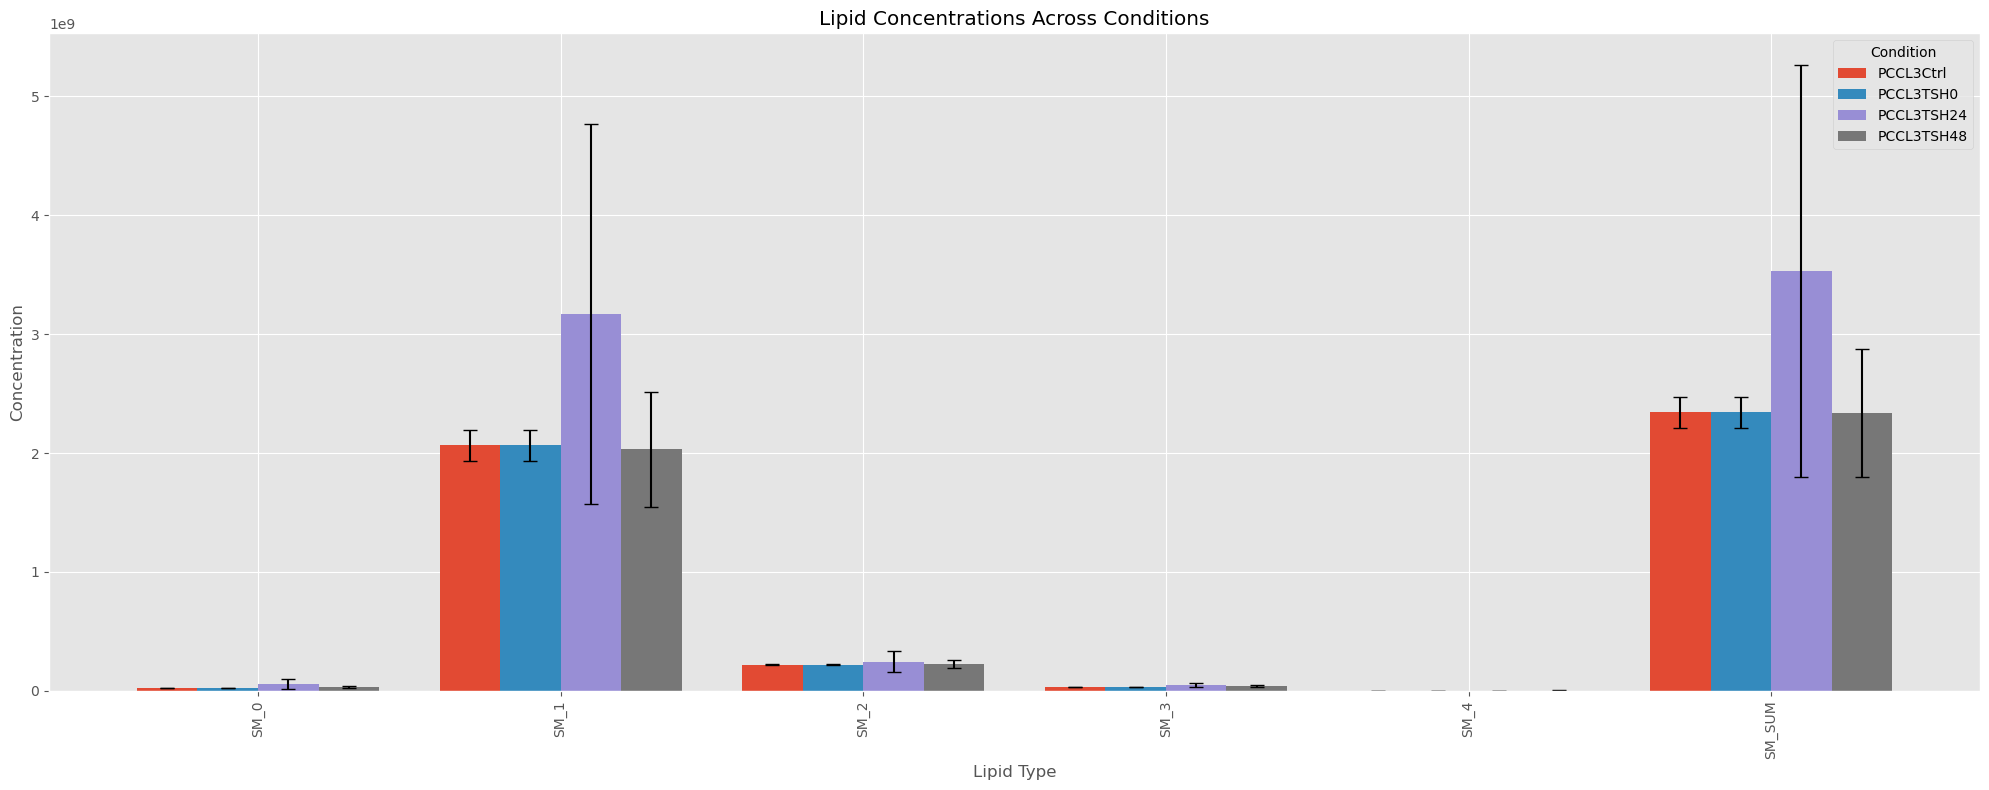

In [75]:
# Setting up the plot
fig, ax = plt.subplots(figsize=(20, 8))

# Determine the number of unique conditions to calculate offsets
conditions = df_pivot['condition'].unique()
width = 0.8 / len(conditions)  # width of each bar
x = np.arange(len(df_pivot['index'].unique()))  # the label locations

# Plotting each condition
for i, condition in enumerate(conditions):
    subset = df_pivot[df_pivot['condition'] == condition]
    ax.bar(x + i * width, subset['mean'], width, yerr=subset['std'], label=condition, capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Lipid Type')
ax.set_ylabel('Concentration')
ax.set_title('Lipid Concentrations Across Conditions')
ax.set_xticks(x + width * (len(conditions) - 1) / 2)  # Adjust x-ticks to be in the middle of the groups
ax.set_xticklabels(df_pivot['index'].unique())
plt.xticks(rotation=90)  # Rotate lipid names for better visibility
ax.legend(title='Condition')

plt.tight_layout()
plt.show()

In [15]:
# Creation of the volcano class to generate the plot.... this could be in a separate file

class Volcano(object):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.style.use('ggplot')
    
    def __init__(self, ratio, p_val, label=None, s_curve_x_axis_overplot=0.5, s_curve_y_axis_overplot=0.5):
        '''
        :param ratio: Pandas.Series or Numpy.Array or List of log2(fold change)
        :param p_val: Pandas.Series or Numpy.Array or List of -log10(p-values) 
        :param label: Pandas.Series or Numpy.Array or ListOfString
        '''
        assert len(ratio) == len(p_val)
        self.df = pd.DataFrame({"ratio": ratio, "p_val": p_val})
        if label is not None:
            self.df["label"] = label
        self.s_curve_y_axis_overplot = s_curve_y_axis_overplot
        self.p_val_cutoff = self.get_p_val_cutoff()
        self.ratio_cutoff = self.get_ratio_cutoff()
        self.df["s_val"] = self.df.apply(self.calc_s_from_row, axis=1)
        self.ratio_for_s = pd.Series(np.linspace(self.df["ratio"].min() - s_curve_x_axis_overplot, self.df["ratio"].max() + s_curve_x_axis_overplot, num=1000))
        self.p_for_s_larger_1 = self.ratio_for_s.apply(self.calc_p_for_s_equals_1)

    def get_p_val_cutoff(self):
        """
        p_val_cutoff = 0.05
        pc = 3.5 + median(p_val(50% lowest log2_ratios))
        -log10_pval of 2.0 --> pval of 0.01
        """
        ### hard coded cutoff of 1%
        # return math.log(0.01, 10) * -1
        quant = self.df["ratio"].quantile(0.5)
        return 2.0 + self.df.loc[self.df["ratio"] < quant, "p_val"].median()

    def get_ratio_cutoff(self):
        """
        log2_ratio_cutoff = 2.0 
        ratio_cutoff_high = 2 + median(ratio(50% lowest log10_p_values))
        ratio_cutoff_low = 0.5 - median(ratio(50% lowest log10_p_values))        
        """
        ### hard coded cutoff of 2 fold enrichment or depletion
        # return math.log(0.5, 2), math.log(2, 2)
        quant = self.df["p_val"].quantile(0.5)
        median_ = self.df.loc[self.df["p_val"] < quant, "ratio"].median()
        ratio_cutoff_high = 2.0 + median_
        ratio_cutoff_low = -2.0 - median_
        return ratio_cutoff_low, ratio_cutoff_high

    def calc_s_from_row(self, row):
        p_val = row["p_val"]
        ratio = row["ratio"]
        return self.calc_s(p_val, ratio)

    def calc_s(self, p_val, ratio):
        """
        so the algorithmn for finding stuff with s > 1 is:
        discard stuff below the ratio_cutoff
        discard stuff below the p-val cutoff
        do the calcuation for the stuff above BOTH cutoffs and accept all with s > 1
        s = (p_val - p_val_cutoff) * (ratio - ratio_cutoff)
        :param p_val: Float(-log10 p-value)
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_delta = 0
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        if ratio > 0:
            ratio_delta = ratio - ratio_cutoff_high
            if ratio_delta < 0:
                return 0
        elif ratio < 0:
            ratio_delta = ratio - ratio_cutoff_low
            if ratio_delta > 0:
                return 0
        ratio_delta = abs(ratio_delta)
        p_val_delta = p_val - self.p_val_cutoff
        if p_val_delta < 0:
            return 0
        return p_val_delta * ratio_delta

    def calc_p_for_s_equals_1(self, ratio):
        """
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        ratio_delta_high = ratio - ratio_cutoff_high
        ratio_delta_low = ratio - ratio_cutoff_low

        if ratio > ratio_cutoff_high:
            return (1.0 / ratio_delta_high) + self.p_val_cutoff
        elif ratio < ratio_cutoff_low:
            return (1.0 / (ratio_delta_low * -1)) + self.p_val_cutoff
        else:
            return np.nan

    def get_fig(self, title="Volcano plot", s_value_cutoff=1.0, tags=None, labels_font=10, color_code=1):
        '''
        tags: list of strings with the lipids to be color coded and added to the legend
        labels_font: size of the labels on the dots of the scatter plot
        color_code: 0 --> no distintion between cutoffs 
                    1 --> red: downregulated, gray: no changes, blue: upregulated
        '''
        
        
        fig, ax1 = plt.subplots(figsize=(12, 12))
        ax1.set_title(title, fontsize=30)

        x = self.df["ratio"]
        y = self.df["p_val"]
        
        if color_code == 1:
            col=[]
            for i in range(0,len(x)):
                if x[i]>=1 and y[i]> 1.3:
                    col.append('b') 
                elif x[i]<=-1 and y[i]> 1.3:
                    col.append('r') 
                else:
                    col.append('gray') 

            for i in range(len(x)):
                ax1.scatter(x[i],y[i],c=col[i], s=80, alpha = 0.2)
        elif color_code == 0:
                ax1.scatter(x,y,c='gray', s=80, alpha = 0.2)
            
        ax1.axhline(y=1.3, color='gray', alpha = 0.5, linestyle = '--', linewidth=2)
        ax1.axvline(x= -1, color='gray', alpha = 0.5, linestyle = '--', linewidth=2)
        ax1.axvline(x= 1, color='gray', alpha = 0.5, linestyle = '--', linewidth=2)
        ax1.set_xlabel('$Log_{2}(fold-change)$', fontsize=20, color='black')
        ax1.set_ylabel('$-Log_{10}(pvalue)$', fontsize=20, color='black')
        ax1.grid(False)
        ax1.set_facecolor("white")
        ax1.patch.set_edgecolor('black')
        ax1.patch.set_linewidth('2') 
        ax1.set_ylim([0, 7])
        
        if tags == None:
            if "label" in self.df.columns:
                cond = (abs(self.df["ratio"]) >= 1)# and (self.df["p_val"] < 1.3)
                for index_, row in self.df[cond].iterrows():
                    label = row["label"]
                    x_coord = row["ratio"]
                    y_coord = row["p_val"]
                    ax1.annotate(label, xy = (x_coord, y_coord), xycoords='data', xytext = (5, 5),
                        textcoords = 'offset points', arrowprops = dict(arrowstyle = "-"), fontsize = labels_font)
        else:
            i=0
            col=['peachpuff','thistle','plum','lightblue','lightgreen','pink','orange','darkseagreen','moccasin','black']
            for tag in tags:
                if "label" in self.df.columns:
                    self.df_2 = self.df[self.df['label'].str.contains(tag)]
                    cond = (abs(self.df_2["ratio"]) >= 1)# and (self.df["p_val"] >= 1.3)
                    x_coord = []
                    y_coord = []
                    for index_, row in self.df_2[cond].iterrows():
                        label = row["label"]
                        x_coord.append(row['ratio'])
                        y_coord.append(row['p_val'])
                        #ax1.annotate(label, xy = (x_coord, y_coord), xycoords='data', xytext = (5, 5),
                         #            textcoords = 'offset points', arrowprops = dict(arrowstyle = "-"), fontsize = labels_font)
                    ax1.scatter(x_coord, y_coord, c=col[i], s=100, alpha = 0.8, label=tag)
                    plt.legend()
                i+=1

        return fig

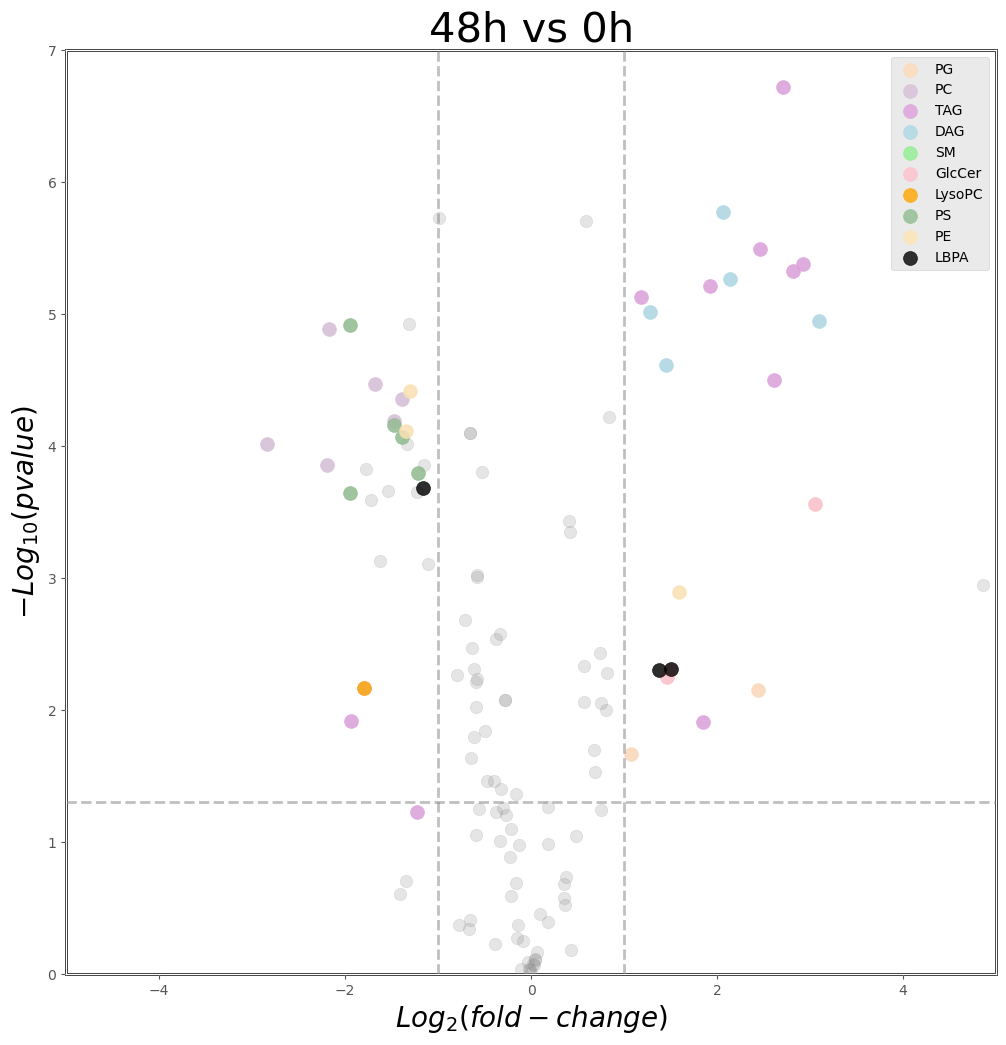

In [16]:
#create the Volcano object

df_pvalue2 = df_pvalue.reset_index()
#df_pvalue2 = df_pvalue2.replace(0, np.nan)
#df_pvalue2 = df_pvalue2.dropna(how='all', axis=0)

v = Volcano(df_pvalue2["log2_fold_change"], df_pvalue2["minuslog10_pvalue"], df_pvalue2["index"], 
            s_curve_x_axis_overplot=.05, 
            s_curve_y_axis_overplot=.5)
tag=['PG','PC','TAG','DAG','SM','GlcCer','LysoPC','PS','PE','LBPA']
fig = v.get_fig(title='48h vs 0h',tags=tag, labels_font=6, color_code=0)
plt.xlim([-5, 5])
fig.savefig(f"../volcano/pccl3_tsh_volcano_{tag}.svg", format='svg', dpi=1200)

In [ ]:
#transform the data to log2

df_t.iloc[:,1:] = df_t.iloc[:,1:].transform(lambda x: np.log2(x.astype('float64')))

In [ ]:
#calculate z_score

z_scores = df_t.iloc[:,1:].transform(lambda x : zscore(x.astype('float64'),ddof=1))

In [ ]:
#merge z_score with Lipid-Class column to create df_final

df_final = pd.concat([df_t.iloc[:,:1], z_scores], axis = 1)
df_final

In [ ]:
#save to csv
#df_final.to_csv('pccl3_tsh.csv')
df_final = pd.read_csv('../procesed_datasets/pccl3_tsh.csv', delimiter = ",", header = 0)
df_final = df_final.drop(['Unnamed: 0'], axis=1)
df_final

In [ ]:
df2

In [ ]:
#Plot
df2 = z_scores.copy()
#df2.set_index('Class-Lipid', inplace=True)


#Clustermap

ax = sns.clustermap(df2,
                    z_score = 1,
                    cmap="vlag",
                    #center=0, 
                    #vmin = -1,
                    #vmax = 1,
                    yticklabels=True,
                    xticklabels=True,
                    figsize=(125, 125),
                    linewidth=.5)

plt.title('Cluster map of Kinase-Lipid before batch correction -Non-normalized-', fontsize = 60) # title with fontsize 20
plt.xlabel('Lipids', fontsize = 80) # x-axis label with fontsize 15
plt.ylabel('Treatment', fontsize =80) # y-axis label with fontsize 15

#ax.savefig("databeforecombat.png")

In [ ]:
fig, ax = plt.subplots(figsize=(80,10))
ax = sns.heatmap(df2,
                 #vmin=-3,
                 #vmax=3,
                 cmap="YlGnBu",
                 linewidths=.1)
fig.savefig("../heatmaps/pccl3_tsh.png")

In [ ]:
df_final

In [ ]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

correlations = df2.corr()
correlations_array = np.asarray(df2.corr())

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

g = sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, method="average", figsize=(100, 100))
g.savefig("pccl3_tsh_corr.png")

In [ ]:
import seaborn
import scipy

g = seaborn.clustermap(df2,method='average')
den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage, labels = df2.index,color_threshold=0.60)  
from collections import defaultdict

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = {}
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

clusters = get_cluster_classes(den)

cluster = []
for i in df.index:
    included=False
    for j in clusters.keys():
        if i in clusters[j]:
            cluster.append(j)
            included=True
    if not included:
        cluster.append(None)

df2["cluster"] = cluster

In [ ]:
df2.columns

In [ ]:
scaler = StandardScaler()
sns.heatmap(scaler.fit_transform(df.to_numpy()))

In [ ]:
#Transpose back the dataframe
df = df_t.T
df = df.reset_index(drop=True)
df = df.rename(columns=df.iloc[0])
df = df[1:]

In [ ]:
#Merging of the datasets of all the lipids

data_concat = pd.concat([data_cl, data_n1,data_p1,data_p2], axis=1)
data_concat = data_concat.loc[:,~data_concat.columns.duplicated()]

# And the cell number
data_concat = data_concat.merge(data_cn, on='CP0_ID.BR')

In [ ]:
#Elimination of unnecesary columns
data_concat = data_concat.drop(['Unnamed: 0','CP0_ID.BR','BR','CP0_ID','CP_plate','GENE_y','Series', 'Cell area covered by objects (%)'], axis=1)

In [ ]:
#Same process as before but for cell number
data_concat['Cell number'] = data_concat['Cell number'].apply(pd.to_numeric, errors='coerce')
data_concat = data_concat.groupby(['GENE_x','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE_x']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
# Loading / Saving dataset

data_concat.to_csv('rawdata_allkinases.csv')
#data_concat = pd.read_csv('data_concat.csv')
#data_concat = data_concat.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Normalising the data by Cell Number
data_concat.iloc[:,2:756] = data_concat.iloc[:,2:756].div(data_concat['Cell number'], axis=0)
data_concat = data_concat.drop(['Cell number'], axis=1)

In [ ]:
#Outliers removal INSIDE BATCH (z-score > 3)
z_scores = data_concat.groupby(['GENE','Batch']).transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Outliers removal OVERALL (z-score > 3)
z_scores = data_concat.iloc[:,2:755].transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Transform the data to log10 (OPTIONAL)

#data_log = data_concat
#data_log.iloc[:,2:755] = np.log10(data_log.iloc[:,2:755])

In [ ]:
# Taking the mean for each kinase

concat_mean = data_concat.groupby(['GENE_x']).mean().reset_index()
concat_mean = concat_mean.drop(['Batch'], axis=1)

In [ ]:
#NORMALIZATION USING STANDARD SCALER
scaler = StandardScaler()

concat_mean.iloc[:,2:756] = scaler.fit_transform(concat_mean.iloc[:,2:756].to_numpy())

In [ ]:
#MAKE GENE AS INDEX
concat_mean.set_index('GENE_x', inplace=True)

In [ ]:
#Filtering all the same lipids in one column / grouped by the name of lipids

filter_col_SM = [col for col in batch if col.startswith('SM')]
filter_col_GlcCer = [col for col in batch if col.startswith('Glc')]
filter_col_Cer = [col for col in batch if col.startswith('DHCer')] + [col for col in batch if col.startswith('Cer')]
filter_col_CL = [col for col in batch if col.startswith('CL')]
filter_col_LysoPC = [col for col in batch if col.startswith('LysoPC')]
filter_col_PC = [col for col in batch if col.startswith('PC')]
filter_col_LysoPE = [col for col in batch if col.startswith('LysoPE')]
filter_col_PE = [col for col in batch if col.startswith('PE')]
filter_col_LysoPI = [col for col in batch if col.startswith('LysoPI')]
filter_col_PI = [col for col in batch if col.startswith('PI')]
filter_col_LysoPS = [col for col in batch if col.startswith('LysoPS')]
filter_col_PS = [col for col in batch if col.startswith('PS')]

lipids_sum = filter_col_CL + filter_col_LysoPC + filter_col_PC + filter_col_LysoPE + filter_col_PE + filter_col_SM + filter_col_GlcCer + filter_col_Cer + filter_col_LysoPI + filter_col_PI + filter_col_LysoPS + filter_col_PS

In [ ]:
#Sum up all the all the lipids with the same head-group

batch['CL_Sum'] = batch[filter_col_CL].sum(axis=1)
batch['LysoPC_Sum'] = batch[filter_col_LysoPC].sum(axis=1)
batch['PC_Sum'] = batch[filter_col_PC].sum(axis=1)
batch['LysoPE_Sum'] = batch[filter_col_LysoPE].sum(axis=1)
batch['PE_Sum'] = batch[filter_col_PE].sum(axis=1)
batch['SM_Sum'] = batch[filter_col_SM].sum(axis=1)
batch['GlcCer_Sum'] = batch[filter_col_GlcCer].sum(axis=1)
batch['Cer_Sum'] = batch[filter_col_Cer].sum(axis=1)
batch['LysoPI_Sum'] = batch[filter_col_LysoPI].sum(axis=1)
batch['PI_Sum'] = batch[filter_col_PI].sum(axis=1)
batch['LysoPS_Sum'] = batch[filter_col_LysoPS].sum(axis=1)
batch['PS_Sum'] = batch[filter_col_PS].sum(axis=1)

In [ ]:
# Eliminate non-essential columns and keep only the sumed-up ones

features_sum = ['GENE', 'Batch', 'CL_Sum', 'LysoPC_Sum', 'PC_Sum',
                'LysoPE_Sum', 'PE_Sum', 'SM_Sum', 'GlcCer_Sum', 'Cer_Sum',
                'LysoPI_Sum', 'PI_Sum', 'LysoPS_Sum', 'PS_Sum']
batch_sum = batch[features_sum]

In [ ]:
pd.set_option('display.max_rows', 800)
batch_sum_mean

In [ ]:
#Calculate z-score
from scipy.stats import zscore
zlog_batch = log_batch.apply(zscore)